This note is for building strtergy for weekly option buy  
Rules 
Version 1 

buy weekly option on Friday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 

Version 2 

buy weekly option on Monday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 



Algo Steps

using nsepy

1) find out all expirty date from 2017 (weekly options was logically good values from 2017)
2) check day (in case thursday is holiday)
3) check if options is in buy status on previous Friday 
4) yes then sell options on that day
5) if this is first time  - check next working day (logically friday )
6) Check future price on the friday 
7) identiy ATM strike price
8) Buy CE and PE for that week 
9) Go to next expiry sell both the option
10) find P&L
11) Find max draw down
12) find CAGR
14) Find AGR


In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date,timedelta
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2019, 4, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        #expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        expirty_Date.append(max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        start_date += delta
    return expirty_Date

def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

def finddatewithvalue(future_logic_df,date_time_obj2):
    for i in range(1,6):
        #print(i)
        date_time_obj = (date_time_obj2+timedelta(days =i)).strftime('%Y-%m-%d')
        #print(future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty )
        if not future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty :
            return date_time_obj
        

              

In [3]:
def getStrikeValue():
    symbol = 'NIFTY'
    expiry_list = getExpirtyDate()
    previous_expiry_date = expiry_list[200]
    current_expiry_date = expiry_list[203]
    print(previous_expiry_date)
    print(current_expiry_date)
    #identiy next working day after previous expiry day
    start_date = previous_expiry_date+timedelta(days =1)
    print(start_date)

    nifty_fut = nsepy.get_history(symbol="NIFTY",
                            start=start_date,
                            end=start_date,
                            index=True,
                            futures=True,
                            expiry_date=current_expiry_date)
    print(nifty_fut)

In [4]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"

In [5]:
    print(os.getcwd())
    print(os.listdir())
    symbol = 'BANKNIFTY'
    banknifty = pd.DataFrame()
    formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
    month_profit_loss = pd.DataFrame()
    start_date = datetime.date(2017, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(years=+1)
   
    year_month_list =[]
    p_N_L_list =[]
    cum_p_N_L_list =[]
    slipage = 5
    P_N_L_dic =  {}

    while start_date <= end_date:
            val =0
            print(str(symbol)+str(start_date.year)+".csv")
            filename = str(symbol)+str(start_date.year)+".csv"
            fname = os.path.join(database,filename)
            fname_day = os.path.join(database,filename)
            df = pd.read_csv(fname)
            df = df.loc[df['SYMBOL']== symbol]
            df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
            df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
            df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
            df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
            formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
            banknifty = banknifty.append(df)
            start_date += delta

    banknifty_option_df = banknifty[banknifty['INSTRUMENT']=='OPTIDX']
    banknifty_fut_df = banknifty[banknifty['INSTRUMENT']=='FUTIDX']
    
    

print(banknifty_fut_df)

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
BANKNIFTY2017.csv
BANKNIFTY2018.csv
BANKNIFTY2019.csv
BANKNIFTY2020.csv
BANKNIFTY2021.csv
              Date INSTRUMENT     SYMBOL   EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN  ...  SETTLE_PR  CONTRACTS  VAL_INLAKH   OPEN_INT  CHG_IN_OI  Year_month  EXPIRY_DT_Year_month
0       2017-01-02     FUTIDX  BANKNIFTY  2017-01-25        0.0         XX  18210.05  ...   18034.30    90862.0   655317.56  2269880.0   234000.0     2017-01               2017-01
1       2017-01-02     FUTIDX  BANKNIFTY  2017-02-23        0.0         XX  18306.75  ...   18102.20     1995.0    14442.96    52200.0     5280.0     2017-01               2017-02
2       2017-01-02     FUTIDX  BAN

In [6]:

option_expiry_date_list = banknifty_option_df.EXPIRY_DT.unique()

#future_logic_df = banknifty_fut_df [banknifty_fut_df['Date'].isin(option_expiry_date_list)]
future_logic_df = banknifty_fut_df 
future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)

option_Df = banknifty_option_df[(banknifty_option_df['Date'].isin(option_expiry_date_list)) &
                                banknifty_option_df['STRIKE_PR'].isin(future_logic_df.str_pric_iden.unique()) ]
option_Df_group = option_Df.groupby('Date')


for name, group in option_Df_group :
    #print(name)
    index = sorted(option_expiry_date_list.tolist()).index(name)
    next_expiry = sorted(option_expiry_date_list.tolist())[index+1]
    #print("next_expiry" ,option_expiry_date_list.tolist()[index+1])(date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = datetime.datetime.strptime(name,'%Y-%m-%d')
    #date_time_obj = (date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = finddatewithvalue(future_logic_df,date_time_obj)
    #print("buy date",date_time_obj)
    strike_price = future_logic_df.loc[future_logic_df['Date']== date_time_obj]['str_pric_iden'].min()
    #print("strike_price",strike_price)
    
    buy_df = banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==date_time_obj)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    sell_df= banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==next_expiry)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    ce_buy = buy_df.loc[buy_df['OPTION_TYP']=='CE']['OPEN'].min()
    ce_sell = sell_df.loc[sell_df['OPTION_TYP']=='CE']['CLOSE'].min()
    pe_buy = buy_df.loc[buy_df['OPTION_TYP']=='PE']['OPEN'].min()
    pe_sell = sell_df.loc[sell_df['OPTION_TYP']=='PE']['CLOSE'].min()
    
    pandl = (ce_sell-ce_buy)+(pe_sell-pe_buy)
    pandl = pandl - abs(pandl*slipage/100)
    if cum_p_N_L_list:
               # print("inlistelse ",val)
                val = cum_p_N_L_list[-1]        
    if not np.isnan(pandl):  
        p_N_L_list.append(pandl)
        cum_p_N_L_list.append(val+pandl)   
        year_month_list.append(next_expiry)
        P_N_L_dic.update({next_expiry :[date_time_obj,next_expiry,strike_price,ce_buy,pe_buy,ce_sell,pe_sell,ce_sell-ce_buy,
                                        pe_sell-pe_buy,pandl,val+pandl]})
    else:
        print("NAN number", date_time_obj,next_expiry)
    #print( ce_buy,ce_sell,pe_buy,pe_sell,"")
    #print("PNL",pandl)
    #print(p_N_L_list)
    #print(cum_p_N_L_list)
    #print(len(year_month_list))
    #print(P_N_L_dic)
month_profit_loss['Year_month'] = pd.Series(year_month_list)
month_profit_loss['P&L'] = pd.Series(p_N_L_list)
month_profit_loss['cum_P&L'] = pd.Series(cum_p_N_L_list)
week_profit_loss = pd.DataFrame(P_N_L_dic)
week_profit_loss = week_profit_loss.transpose()
week_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                           'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
print(week_profit_loss)

    


<ipython-input-6-df7f110389cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)


NAN number 2019-03-29 2019-04-04
NAN number 2021-04-16 2021-04-22
              Buy_date   Sell_Date Strike_price Call__buy_price Put_buy_price Call_sell_price Put_sell_price Call_PandL Put_PandL Total_PandL   Cum_PandL
2017-01-12  2017-01-06  2017-01-12        18100           157.0        125.35          767.65           0.05     610.65    -125.3    461.0825    461.0825
2017-01-19  2017-01-13  2017-01-19        18900           142.9        125.85           230.5           0.05       87.6    -125.8      -40.11    420.9725
2017-01-25  2017-01-20  2017-01-25        19000           166.5        107.05           440.7            0.1      274.2   -106.95    158.8875      579.86
2017-02-02  2017-01-27  2017-02-02        19500           201.5         196.0          575.45           0.05     373.95   -195.95       169.1      748.96
2017-02-09  2017-02-03  2017-02-09        20000           143.4         173.0          131.45           0.25     -11.95   -172.75    -193.935     555.025
2017-02-16

In [7]:
month_profit_loss

,Year_month,P&L,cum_P&L
0,2017-01-12,461.0825,461.0825
1,2017-01-19,-40.1100,420.9725
2,2017-01-25,158.8875,579.8600
3,2017-02-02,169.1000,748.9600
4,2017-02-09,-193.9350,555.0250
5,2017-02-16,-334.6350,220.3900
6,2017-02-23,-215.8800,4.5100
7,2017-03-02,-70.5075,-65.9975
8,2017-03-09,-33.6000,-99.5975
9,2017-03-16,-45.8325,-145.4300


In [16]:
min(week_profit_loss['Total_PandL'])

-2168.67

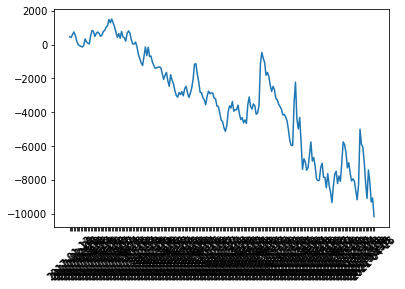

In [8]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(week_profit_loss['Sell_Date'], week_profit_loss['Cum_PandL'])
plt.show()
#plt.figure(figsize=(20,10))


In [9]:

week_profit_loss['Year'] = pd.to_datetime(week_profit_loss['Sell_Date']).dt.strftime('%Y')
grp = week_profit_loss.groupby(['Year'])

print(len(grp['Total_PandL'].sum()))   
total_period = len(grp['Total_PandL'].sum())
start_val = grp['Total_PandL'].sum()[0]
end_val= grp['Total_PandL'].sum()[total_period-1]
print(total_period,start_val,end_val)
print(cagr(start_val,end_val,total_period))

5
5 -824.2650000000003 -2236.86
0.2834914680421454


In [10]:
result = cagr(1,3913.3675,5)
print("{:.2%}".format(result))

690.93%


In [11]:
week_profit_loss.to_csv("weekly_banknifty_option_buy_Pandl.csv")

In [12]:
sorted(option_expiry_date_list.tolist())

['2017-01-05',
 '2017-01-12',
 '2017-01-19',
 '2017-01-25',
 '2017-02-02',
 '2017-02-09',
 '2017-02-16',
 '2017-02-23',
 '2017-03-02',
 '2017-03-09',
 '2017-03-16',
 '2017-03-23',
 '2017-03-30',
 '2017-04-06',
 '2017-04-13',
 '2017-04-20',
 '2017-04-27',
 '2017-05-04',
 '2017-05-11',
 '2017-05-18',
 '2017-05-25',
 '2017-06-01',
 '2017-06-08',
 '2017-06-15',
 '2017-06-22',
 '2017-06-29',
 '2017-07-06',
 '2017-07-13',
 '2017-07-20',
 '2017-07-27',
 '2017-08-03',
 '2017-08-10',
 '2017-08-17',
 '2017-08-24',
 '2017-08-31',
 '2017-09-07',
 '2017-09-14',
 '2017-09-21',
 '2017-09-28',
 '2017-10-05',
 '2017-10-12',
 '2017-10-18',
 '2017-10-26',
 '2017-11-02',
 '2017-11-09',
 '2017-11-16',
 '2017-11-23',
 '2017-11-30',
 '2017-12-07',
 '2017-12-14',
 '2017-12-21',
 '2017-12-28',
 '2018-01-04',
 '2018-01-11',
 '2018-01-18',
 '2018-01-25',
 '2018-02-01',
 '2018-02-08',
 '2018-02-15',
 '2018-02-22',
 '2018-03-01',
 '2018-03-08',
 '2018-03-15',
 '2018-03-22',
 '2018-03-28',
 '2018-04-05',
 '2018-04-

218


ValueError: Length of values (167) does not match length of index (218)

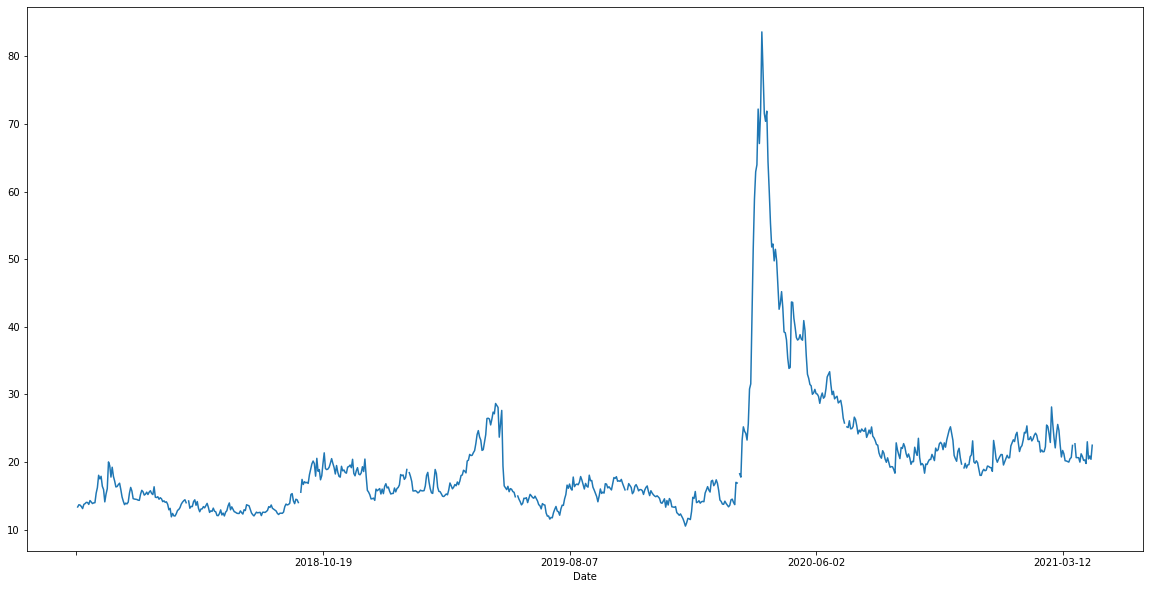

In [13]:
vix = nsepy.get_history(symbol="INDIAVIX",
            start=date(2018,1,1),
            end=date(2021,4,30),
            index=True)
plt.figure(figsize=(20,10))
vix['Close'].plot()
#print(vix.index)
#print(list(month_profit_loss['Year_month']))
vix['Date_val'] = vix.index
vix['Date_val'] =vix[['Date_val']].astype(str)
print(len(list(month_profit_loss['Year_month'])))
#print((vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]))
val= list(vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]['Close'])
month_profit_loss['vix']= val
print(month_profit_loss)

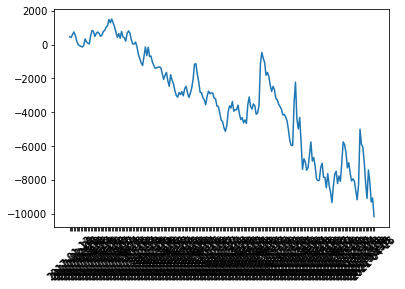

KeyError: 'vix'

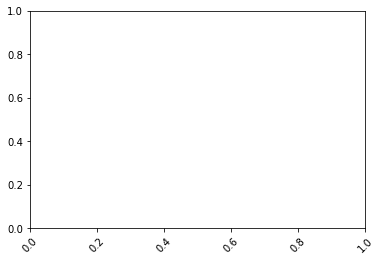

In [14]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['cum_P&L'])
plt.show()
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['vix'])
plt.show()